In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruit-dataset/images/apple fruit/Image_22.jpg
/kaggle/input/fruit-dataset/images/apple fruit/Image_34.jpeg
/kaggle/input/fruit-dataset/images/apple fruit/Image_13.png
/kaggle/input/fruit-dataset/images/apple fruit/Image_4.jpg
/kaggle/input/fruit-dataset/images/apple fruit/Image_12.jpg
/kaggle/input/fruit-dataset/images/apple fruit/Image_16.jpg
/kaggle/input/fruit-dataset/images/apple fruit/Image_2.jpg
/kaggle/input/fruit-dataset/images/apple fruit/Image_7.jpg
/kaggle/input/fruit-dataset/images/apple fruit/Image_5.jpg
/kaggle/input/fruit-dataset/images/apple fruit/Image_28.png
/kaggle/input/fruit-dataset/images/apple fruit/Image_36.jpg
/kaggle/input/fruit-dataset/images/apple fruit/Image_18.jpg
/kaggle/input/fruit-dataset/images/apple fruit/Image_33.jpg
/kaggle/input/fruit-dataset/images/apple fruit/Image_19.jpg
/kaggle/input/fruit-dataset/images/apple fruit/Image_27.jpg
/kaggle/input/fruit-dataset/images/apple fruit/Image_11.jpg
/kaggle/input/fruit-dataset/images/apple fr

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

2025-04-14 16:41:52.950560: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744648913.279258      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744648913.369311      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2
)

train_gen = datagen.flow_from_directory(
    '/kaggle/input/fruit-dataset/images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    '/kaggle/input/fruit-dataset/images',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 160 images belonging to 5 classes.
Found 40 images belonging to 5 classes.


In [4]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(train_gen.num_classes, activation='softmax')(x)

I0000 00:00:1744648934.794423      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1744648934.795114      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [6]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(patience=5, restore_best_weights=True)

In [7]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=25,
    callbacks=[early_stop]
)

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1744648989.870750     109 service.cc:148] XLA service 0x7f5bd41122c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744648989.871865     109 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1744648989.871889     109 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1744648990.791355     109 cuda_dnn.cc:529] Loaded cuDNN version 90300


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2104 - loss: 2.2961

I0000 00:00:1744648995.963843     109 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.2066 - loss: 2.3060 - val_accuracy: 0.3500 - val_loss: 1.5147
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 432ms/step - accuracy: 0.3061 - loss: 1.9816 - val_accuracy: 0.3750 - val_loss: 1.4600
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 430ms/step - accuracy: 0.3263 - loss: 1.8119 - val_accuracy: 0.4750 - val_loss: 1.3324
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 428ms/step - accuracy: 0.3516 - loss: 1.7840 - val_accuracy: 0.5750 - val_loss: 1.1852
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 428ms/step - accuracy: 0.3655 - loss: 1.7092 - val_accuracy: 0.6750 - val_loss: 1.0761
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 411ms/step - accuracy: 0.3985 - loss: 1.7178 - val_accuracy: 0.7250 - val_loss: 1.0826
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 439ms/step - accuracy: 0.4048 - loss: 1.4252 - val_accuracy: 0.7250 - val_loss: 0.9683
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 424ms/step - accuracy: 0.4591 - loss: 1.3512 - val_accuracy: 0.8000 - val_loss: 0.9200
Epoch

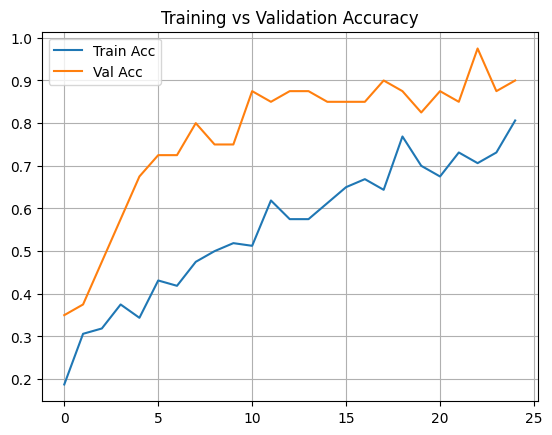

In [8]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
model.save('fruit_classifier_using_pretrained.h5')

In [10]:
# From scratch

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [11]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    '/kaggle/input/fruit-dataset/images',             
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    '/kaggle/input/fruit-dataset/images',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 160 images belonging to 5 classes.
Found 40 images belonging to 5 classes.


In [13]:
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(5, activation='softmax')  # Only 5 classes now
    ])
    
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [14]:
model = create_model()

early_stop = EarlyStopping(patience=5, restore_best_weights=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=25,
    callbacks=[early_stop]
)

Epoch 1/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 945ms/step - accuracy: 0.2350 - loss: 1.7242 - val_accuracy: 0.2000 - val_loss: 1.5628
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 323ms/step - accuracy: 0.3006 - loss: 1.5317 - val_accuracy: 0.4500 - val_loss: 1.4048
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 347ms/step - accuracy: 0.3378 - loss: 1.4052 - val_accuracy: 0.7000 - val_loss: 1.1638
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 316ms/step - accuracy: 0.4637 - loss: 1.1799 - val_accuracy: 0.5750 - val_loss: 1.0845
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 333ms/step - accuracy: 0.4721 - loss: 1.2037 - val_accuracy: 0.5750 - val_loss: 1.0383
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 331ms/step - accuracy: 0.5696 - loss: 1.0554 - val_accuracy: 0.6750 - val_loss: 1.0470
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 344ms/step - accuracy: 0.5928 - loss: 1.0371 - val_accuracy: 0.6000 - val_loss: 1.0335
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 327ms/step - accuracy: 0.5853 - loss: 0.9842 - val_accuracy: 0.6000 - val_loss

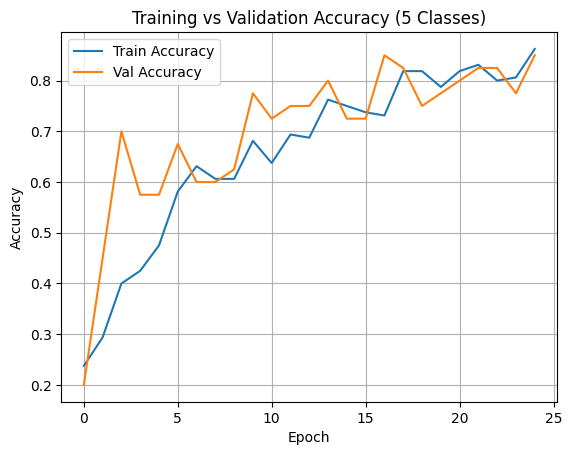

In [16]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy (5 Classes)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [17]:
model.save("fruit_classifier_scratch.h5")